# Problem 1

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import quandl
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = quandl.get("USTREASURY/YIELD", authtoken=token)
df

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,3.79,4.10,4.29,4.72,4.67,4.26,3.97,3.62,3.54,3.42,3.66,3.42
2022-12-08,3.75,4.11,4.28,4.71,4.71,4.31,4.04,3.71,3.63,3.48,3.71,3.44
2022-12-09,3.81,4.13,4.31,4.72,4.72,4.33,4.07,3.75,3.69,3.57,3.82,3.56


In [4]:
tau = np.array([1/12.0, 3/12.0, 6/12.0, 1, 2, 3, 5, 7, 10, 20, 30])
df = df[(df.index>"2012-01-01") & (df.index<"2016-02-01")].drop(["2 MO"], axis=1)
df.columns = [f"{t:.2f}" for t in tau]
df.sort_index(ascending=True, inplace=True)
df

,0.08,0.25,0.50,1.00,2.00,3.00,5.00,7.00,10.00,20.00,30.00
Date,,,,,,,,,,,
2012-01-03,0.01,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
2012-01-04,0.01,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
2012-01-05,0.01,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
2012-01-06,0.02,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
2012-01-09,0.01,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-25,0.25,0.31,0.42,0.47,0.88,1.10,1.47,1.79,2.03,2.42,2.80
2016-01-26,0.29,0.31,0.45,0.47,0.85,1.07,1.45,1.76,2.01,2.41,2.79
2016-01-27,0.28,0.32,0.43,0.47,0.84,1.07,1.43,1.76,2.02,2.42,2.80


# 1.1 Assume lambda = 0.05

In [5]:
def ComputeX(tau, lambd=0.05):
    # t0: numpy array of start time
    # T: 30 yrs
    l1 = np.ones(len(tau))
    l2 = (1 - np.exp(-lambd * tau)) / lambd / tau
    l3 = l2 - np.exp(-lambd * tau)
    return np.concatenate((l1, l2, l3))

X = ComputeX(tau, 0.05).reshape((3, 11)).T 
X

array([[1.        , 0.99791956, 0.00207756],
       [1.        , 0.99377596, 0.00619816],
       [1.        , 0.98760352, 0.01229361],
       [1.        , 0.97541151, 0.02418209],
       [1.        , 0.95162582, 0.0467884 ],
       [1.        , 0.92861349, 0.06790551],
       [1.        , 0.88479687, 0.10599608],
       [1.        , 0.84374832, 0.13906023],
       [1.        , 0.78693868, 0.18040802],
       [1.        , 0.63212056, 0.26424112],
       [1.        , 0.51791323, 0.29478307]])

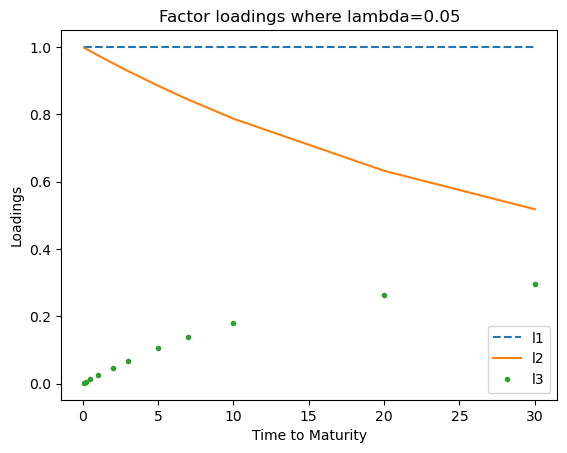

In [6]:
# plot loadings
plt.title("Factor loadings where lambda=0.05")
plt.xlabel("Time to Maturity")
plt.ylabel("Loadings")
plt.plot(tau, X[:, 0], '--', label="l1")
plt.plot(tau, X[:, 1], label="l2")
plt.plot(tau, X[:, 2], '.', label="l3")
plt.legend(loc="best")

In [8]:
def EstOLS(df, tau, lambd=0.05):
    # compute factor loadings
    X = ComputeX(tau, lambd).reshape((3, 11)).T
    
    b = {} 
    pred_Y = {} 
    for date in df.index:
        Y = df.loc[date, :].values.reshape(11, 1) # true yields
        result = sm.OLS(Y, X).fit()
        b[date] = result.params.reshape(-1) # n_date * 3
        pred_Y[date] = result.predict().reshape(-1) # n_date * 11

    df_b = pd.DataFrame(b).transpose()
    df_b.columns = ["beta1", "beta2", "beta3"]
    df_predY = pd.DataFrame(pred_Y).transpose()
    df_predY.columns = [f"{t:.2f}" for t in tau]
    return df_b, df_predY
df_b, df_predY = EstOLS(df, tau, lambd=0.0609)

In [9]:
df_b

,beta1,beta2,beta3
2012-01-03,1.811605,-1.939429,6.997430
2012-01-04,1.906268,-2.040482,7.009114
2012-01-05,2.012857,-2.146559,6.930034
2012-01-06,2.089012,-2.220398,6.657876
2012-01-09,2.115680,-2.254093,6.625227
...,...,...,...
2016-01-25,-0.755162,1.052884,9.892559
2016-01-26,-0.446844,0.756800,9.315465
2016-01-27,-0.414726,0.717301,9.309585
2016-01-28,-0.235129,0.542834,8.961620


In [10]:
df_predY

,0.08,0.25,0.50,1.00,2.00,3.00,5.00,7.00,10.00,20.00,30.00
2012-01-03,-0.105216,-0.060405,0.005803,0.134666,0.378705,0.605471,1.011534,1.360899,1.793889,2.665867,3.008788
2012-01-04,-0.111319,-0.065940,0.001112,0.131634,0.378884,0.608722,1.020536,1.375173,1.815266,2.705406,3.060526
2012-01-05,-0.110739,-0.065221,0.002042,0.132999,0.381159,0.611958,1.025823,1.382646,1.826194,2.728341,3.094799
2012-01-06,-0.108924,-0.064398,0.001410,0.129559,0.372506,0.598594,1.004409,1.354798,1.791242,2.684970,3.055834
2012-01-09,-0.115948,-0.071415,-0.005595,0.122583,0.365617,0.591824,0.997961,1.348769,1.785980,2.682940,3.057285
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-25,0.320072,0.364294,0.429444,0.555576,0.791828,1.007944,1.385168,1.697207,2.061829,2.646446,2.680192
2016-01-26,0.331596,0.374421,0.437530,0.559770,0.788965,0.998934,1.366325,1.671408,2.030065,2.620658,2.680328
2016-01-27,0.324301,0.367296,0.430658,0.553396,0.783566,0.994476,1.363659,1.670420,2.031395,2.628280,2.692551
2016-01-28,0.328993,0.371125,0.433226,0.553557,0.779355,0.986448,1.349491,1.651863,2.008977,2.608772,2.688192


# 1.2

0.47000000000000003

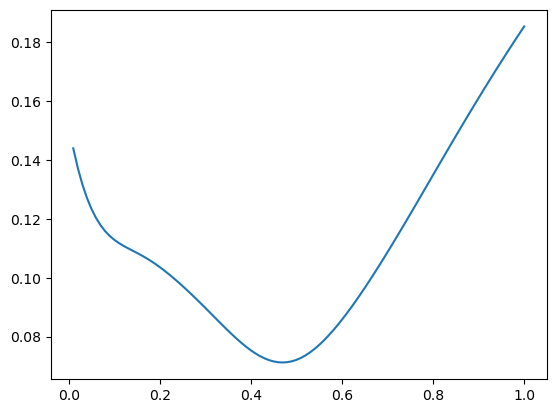

In [11]:
def Optimization(df, lambdas, tau):
    RMSE_list = []
    for lambd in lambdas:
        df_b, df_predY = EstOLS(df, tau, lambd=lambd)
        RMSE = mean_squared_error(df, df_predY, squared=False)
        RMSE_list.append(RMSE)
    plt.plot(lambdas, RMSE_list)
    min_index = np.argmin(RMSE_list)
    best_lambd = lambdas[min_index]
    return best_lambd
lambdas = np.linspace(0.01, 1, num=100)
best_lambd = Optimization(df, lambdas, tau)
best_lambd

# Problem 2

# 2.1

In [12]:
df_b, df_predY = EstOLS(df, tau, lambd=0.47)
df_resid = df - df_predY
df_resid["RMSE"] = df_resid.pow(2).mean(axis=1)
Max_dates = df_resid.sort_values(by="RMSE", ascending=False).index[:30]
Max_dates

DatetimeIndex(['2013-12-31', '2013-12-24', '2013-12-27', '2014-04-24',
               '2014-04-21', '2014-01-02', '2014-04-17', '2014-04-22',
               '2013-12-30', '2014-04-25', '2014-04-03', '2014-04-23',
               '2014-04-28', '2014-09-19', '2014-04-02', '2014-04-29',
               '2014-01-03', '2013-12-23', '2013-12-26', '2014-09-18',
               '2013-12-19', '2014-01-08', '2014-09-24', '2014-09-12',
               '2014-09-26', '2013-12-20', '2014-09-22', '2012-12-06',
               '2014-04-30', '2014-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

# 2.2

In [13]:
df_halflives = pd.DataFrame(index = Max_dates, columns=["beta1", "beta2", "beta3"])
# coefficients of beta1, beta2, and beta3
df_predbetas = pd.DataFrame(index = Max_dates, columns=["beta1", "beta2", "beta3"])
for date in Max_dates:
    # 6m of data prior
    df_betas_6m = df_b.loc[date - relativedelta(months=6): date]
    for col in df_betas_6m.columns: # beta1, beta2, beta3
        # fit AR(1)
        AR_X = df_betas_6m[col].shift(10)
        AR_X = sm.add_constant(AR_X).iloc[10:]
        AR_Y = df_betas_6m[col].iloc[10:]
        result = sm.OLS(AR_Y, AR_X).fit()
        df_predbetas.loc[date][col] = result.predict()[-1]

        # compute half-lives
        halflife = -np.log(2) / np.log(abs(result.params[1])) * 10 # 10 days interval
        df_halflives.loc[date][col] = halflife
df_halflives.head()

,beta1,beta2,beta3
Date,,,
2013-12-31,11.025363,12.436457,8.779324
2013-12-24,10.364083,10.78858,9.626236
2013-12-27,10.69727,11.624333,8.979086
2014-04-24,50.376985,20.479142,84.166817
2014-04-21,33.868486,17.04528,66.2506


In [14]:
df_predbetas.head()

,beta1,beta2,beta3
Date,,,
2013-12-31,4.59866,-4.590781,-4.603852
2013-12-24,4.552082,-4.521553,-4.69208
2013-12-27,4.596685,-4.586195,-4.616918
2014-04-24,4.213004,-4.311776,-3.373353
2014-04-21,4.236509,-4.338927,-3.226139


In [15]:
predt10_yield = df_predbetas @ ComputeX(tau, 0.47).reshape((3, 11))
predt10_yield.columns = df.columns
predt10_yield

,0.08,0.25,0.50,1.00,2.00,3.00,5.00,7.00,10.00,20.00,30.00
Date,,,,,,,,,,,
2013-12-31,0.00878,0.017132,0.044185,0.139978,0.436463,0.793705,1.498258,2.079564,2.702021,3.620969,3.946562
2013-12-24,0.02841,0.031076,0.050426,0.133385,0.412034,0.758483,1.452781,2.030713,2.65224,3.572378,3.898637
2013-12-27,0.011053,0.018774,0.044983,0.139404,0.434095,0.790374,1.494264,2.075594,2.698377,3.618093,3.943986
2014-04-24,-0.079786,-0.038415,0.030985,0.189642,0.548704,0.916829,1.576333,2.08979,2.623424,3.395784,3.667962
2014-04-21,-0.080099,-0.032527,0.045105,0.216932,0.592536,0.968754,1.632016,2.142944,2.670902,3.432048,3.699982
2014-01-02,0.013629,0.020628,0.045833,0.138504,0.430508,0.784883,1.486395,2.066396,2.688092,3.606523,3.93199
2014-04-17,-0.084704,-0.029946,0.057252,0.244469,0.639686,1.025844,1.694592,2.203534,2.725933,3.475592,3.739143
2014-04-22,-0.082071,-0.036288,0.038898,0.206577,0.576188,0.948529,1.607592,2.116648,2.643439,3.403662,3.671346
2013-12-30,0.010964,0.019186,0.045996,0.141171,0.436108,0.791664,1.493075,2.071875,2.691693,3.606788,3.93102


# 2.3

In [16]:
predictRW_yield = df.loc[Max_dates]
true_yield = df.shift(-10).loc[Max_dates]
rmse_dns = mean_squared_error(predt10_yield, true_yield, squared=False)
rmse_rw = mean_squared_error(predictRW_yield, true_yield, squared=False)
print(f"The rmse of DNS forecast is {rmse_dns:.4f}.")
print(f"The rmse of Random Walk forecast is {rmse_rw:.4f}.")

The rmse of DNS forecast is 0.1274.
The rmse of Random Walk forecast is 0.0778.


The prediction is more accurate under the random walk forecast

# 3

In [17]:
result_list = []
for n in range(1,21):
    result = quandl.get(f"CHRIS/CME_ED{n}", authtoken=token, start_date="2000-01-01")["Settle"]
    result_list.append(result)
df_result = pd.DataFrame(result_list).T
df_result.columns = [f"ED{n}" for n in range(1, 21)]
df_result.head()

,ED1,ED2,ED3,ED4,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,93.780,93.445,93.220,92.990,92.975,92.885,92.840,92.770,92.815,92.805,92.795,92.735,92.765,92.740,92.720,92.640,92.645,92.600,92.570,92.480
2000-01-04,93.795,93.495,93.265,93.045,93.030,92.940,92.895,92.820,92.865,92.855,92.845,92.790,92.820,92.795,92.775,92.695,92.700,92.655,92.625,92.535
2000-01-05,93.790,93.450,93.210,92.995,92.975,92.880,92.830,92.750,92.785,92.775,92.760,92.700,92.730,92.705,92.680,92.595,92.600,92.555,92.520,92.425
2000-01-06,93.790,93.470,93.240,93.035,93.015,92.920,92.865,92.785,92.825,92.815,92.800,92.740,92.770,92.745,92.725,92.640,92.645,92.600,92.565,92.470
2000-01-07,93.795,93.510,93.280,93.090,93.070,92.975,92.930,92.845,92.885,92.875,92.860,92.800,92.830,92.805,92.785,92.700,92.705,92.660,92.625,92.530


In [18]:
df_ed_rates = 100 - df_result
df_ed_rates

,ED1,ED2,ED3,ED4,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,6.220,6.555,6.780,7.010,7.025,7.115,7.160,7.230,7.185,7.195,7.205,7.265,7.235,7.260,7.280,7.360,7.355,7.400,7.430,7.520
2000-01-04,6.205,6.505,6.735,6.955,6.970,7.060,7.105,7.180,7.135,7.145,7.155,7.210,7.180,7.205,7.225,7.305,7.300,7.345,7.375,7.465
2000-01-05,6.210,6.550,6.790,7.005,7.025,7.120,7.170,7.250,7.215,7.225,7.240,7.300,7.270,7.295,7.320,7.405,7.400,7.445,7.480,7.575
2000-01-06,6.210,6.530,6.760,6.965,6.985,7.080,7.135,7.215,7.175,7.185,7.200,7.260,7.230,7.255,7.275,7.360,7.355,7.400,7.435,7.530
2000-01-07,6.205,6.490,6.720,6.910,6.930,7.025,7.070,7.155,7.115,7.125,7.140,7.200,7.170,7.195,7.215,7.300,7.295,7.340,7.375,7.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,0.140,0.210,0.205,0.280,0.375,0.530,0.640,0.775,0.995,1.125,1.235,1.345,1.455,1.550,1.610,1.680,1.740,1.810,1.855,1.915
2021-06-24,0.145,0.215,0.215,0.290,0.385,0.540,0.650,0.785,1.005,1.140,1.250,1.360,1.465,1.560,1.620,1.685,1.740,1.810,1.855,1.910
2021-06-25,0.145,0.215,0.210,0.290,0.390,0.550,0.665,0.805,1.030,1.165,1.280,1.395,1.505,1.600,1.660,1.725,1.785,1.855,1.900,1.955


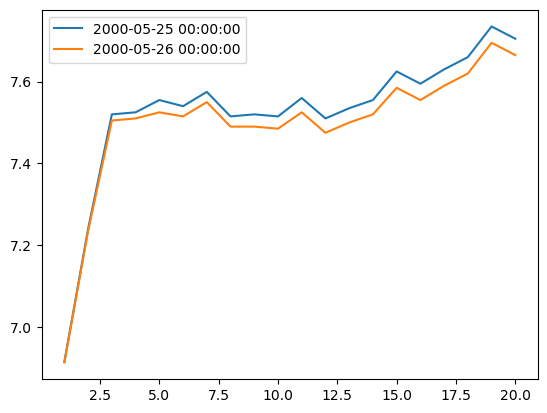

In [19]:
plt.plot(np.arange(1, 21), df_ed_rates.iloc[100], label=df_ed_rates.index[100])
plt.plot(np.arange(1, 21), df_ed_rates.iloc[101], label=df_ed_rates.index[101])
plt.legend()